In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
cars_data= pd.read_csv("C:/Users/rbsal/Downloads/Toyota.csv",index_col=0,na_values=["??","????"])

In [12]:
# creating copy of original data
cars_data2=cars_data.copy()

In [13]:
cars_data2.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [14]:
missing_count=cars_data2.isnull().sum()
missing_count

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [15]:
cars_data2.isna()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1431,False,True,False,False,False,False,False,False,False,False
1432,False,False,True,False,False,False,False,False,False,False
1433,False,True,False,False,False,False,False,False,False,False
1434,False,False,True,True,False,False,False,False,False,False


In [14]:
cars_data2['Price'].unique

<bound method Series.unique of 0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64>

In [8]:
cars_data2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [10]:
cars_data2.drop_duplicates(subset=None,keep='first', inplace=False, ignore_index=False)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


In [11]:
pd.crosstab(index=cars_data2['FuelType'],columns='count',dropna=True)

col_0,count
FuelType,
CNG,15
Diesel,144
Petrol,1177


In [12]:
pd.crosstab(index=cars_data2['Automatic'],columns=cars_data2['FuelType'],dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,15,144,1104
1,0,0,73


In [13]:
pd.crosstab(index=cars_data2['Automatic'],columns=cars_data2['FuelType'],normalize=True,dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011228,0.107784,0.826347
1,0.000000,0.000000,0.054641


In [12]:
pd.crosstab(index=cars_data2['Automatic'],columns=cars_data2['FuelType'],normalize=True,margins=True,dropna=True)

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011228,0.107784,0.826347,0.945359
1,0.000000,0.000000,0.054641,0.054641
All,0.011228,0.107784,0.880988,1.000000


In [13]:
pd.crosstab(index=cars_data2['Automatic'],columns=cars_data2['FuelType'],normalize='index',margins=True,dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011876,0.114014,0.874109
1,0.000000,0.000000,1.000000
All,0.011228,0.107784,0.880988


In [14]:
pd.crosstab(index=cars_data2['Automatic'],columns=cars_data2['FuelType'],normalize='columns',margins=True,dropna=True)

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,1.0,1.0,0.937978,0.945359
1,0.0,0.0,0.062022,0.054641


In [15]:
numerical_data=cars_data2.select_dtypes(exclude=[object])

In [16]:
print(numerical_data.shape)

(1436, 8)


In [18]:
corr_matrix=numerical_data.corr()
corr_matrix

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
Price,1.000000,-0.878407,-0.574720,0.309902,0.112041,0.033081,0.165067,0.581198
Age,-0.878407,1.000000,0.512735,-0.157904,-0.099659,0.032573,-0.120706,-0.464299
KM,-0.574720,0.512735,1.000000,-0.335285,-0.093825,-0.081248,0.299993,-0.026271
HP,0.309902,-0.157904,-0.335285,1.000000,0.064749,0.013755,0.053758,0.086737
MetColor,0.112041,-0.099659,-0.093825,0.064749,1.000000,-0.013973,0.029189,0.057142
Automatic,0.033081,0.032573,-0.081248,0.013755,-0.013973,1.000000,-0.069321,0.057249
CC,0.165067,-0.120706,0.299993,0.053758,0.029189,-0.069321,1.000000,0.651450
Weight,0.581198,-0.464299,-0.026271,0.086737,0.057142,0.057249,0.651450,1.000000


In [18]:
df = pd.DataFrame(cars_data2, columns=['Price'])

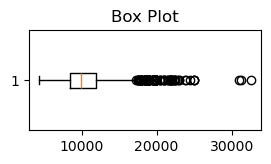

In [19]:
plt.figure(figsize=(3, 1.3))
plt.boxplot(df['Price'], vert=False)
plt.title('Box Plot')
plt.show()